「皆さん、こんにちは。今日は機械学習の基礎として、を使ってサンプルデータを1次元ガウシアンの線形結合で近似する方法を学習します。さらに、ガウシアンの平均や分散のパラメータも学習可能にすることで、近似精度が向上することを確認していきましょう。

まずは必要なライブラリをインポートし、サンプルデータを生成しましょう。」

In [6]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

def gen_data(n_samples=100):
    x = torch.linspace(-2, 2, n_samples)
    y = torch.sin(3 * x) + 0.1 * torch.randn(x.size())
    return x, y

x, y = gen_data()


この関数では、-5から5までの一定間隔の100点のxデータを作り、sin関数の値にガウシアンノイズを加えてyデータを生成しています。

次に、1次元ガウシアンの線形結合でデータを近似するモデルクラスを定義しましょう。」

In [7]:
class GaussianMixture(nn.Module):
    def __init__(self, n_gaussians=10):
        super().__init__()
        self.n_gaussians = n_gaussians
        self.weights = nn.Parameter(torch.randn(n_gaussians))
        self.means = nn.Parameter(torch.randn(n_gaussians))
        self.stds = nn.Parameter(torch.ones(n_gaussians))

    def forward(self, x):
        gaussians = []
        for mean, std in zip(self.means, self.stds):
            gaussians.append(torch.exp(-(x - mean)**2 / (2 * std**2)) / (std * torch.sqrt(torch.tensor(2 * torch.pi))))
        gaussians = torch.stack(gaussians, dim=1)
        return (gaussians * self.weights.view(1, -1)).sum(dim=1)

「nn.Moduleを継承したGaussianMixtureクラスでは、n_gaussiansという引数で指定した数の1次元ガウシアンの線形結合を計算しています。weightsは各ガウシアンの重み係数、meansは平均値、stdsは標準偏差を表すパラメータとなります。forward()メソッドで実際の計算を行っています。

それでは、モデルのインスタンスを作成し、損失関数と最適化手法を設定しましょう。」

In [8]:
model = GaussianMixture(n_gaussians=10)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

「モデルには5つのガウシアンを使うよう指定しています。損失関数にはMSEを、最適化手法にはAdamを使います。

それでは学習を行うループを回しましょう。」


In [9]:
n_epochs = 10000
for epoch in range(n_epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')

Epoch [100/10000], Loss: 0.7891
Epoch [200/10000], Loss: 0.5476
Epoch [300/10000], Loss: 0.3671
Epoch [400/10000], Loss: 0.2017
Epoch [500/10000], Loss: 0.0917
Epoch [600/10000], Loss: 0.0616
Epoch [700/10000], Loss: 0.0398
Epoch [800/10000], Loss: 0.0316
Epoch [900/10000], Loss: 0.0280
Epoch [1000/10000], Loss: 0.0252
Epoch [1100/10000], Loss: 0.0228
Epoch [1200/10000], Loss: 0.0209
Epoch [1300/10000], Loss: 0.0194
Epoch [1400/10000], Loss: 0.0181
Epoch [1500/10000], Loss: 0.0172
Epoch [1600/10000], Loss: 0.0164
Epoch [1700/10000], Loss: 0.0158
Epoch [1800/10000], Loss: 0.0154
Epoch [1900/10000], Loss: 0.0151
Epoch [2000/10000], Loss: 0.0148
Epoch [2100/10000], Loss: 0.0146
Epoch [2200/10000], Loss: 0.0144
Epoch [2300/10000], Loss: 0.0143
Epoch [2400/10000], Loss: 0.0141
Epoch [2500/10000], Loss: 0.0139
Epoch [2600/10000], Loss: 0.0138
Epoch [2700/10000], Loss: 0.0136
Epoch [2800/10000], Loss: 0.0134
Epoch [2900/10000], Loss: 0.0131
Epoch [3000/10000], Loss: 0.0129
Epoch [3100/10000],

「1000エポック分のループを回し、100エポックごとに損失値を出力しています。model(x)で予測値y_predを計算し、実際のyとの損失を求めています。loss.backward()で誤差を逆伝搬させ、optimizer.step()でパラメータを更新しています。

学習が終わったら、予測値y_predとデータyをプロットしましょう。」

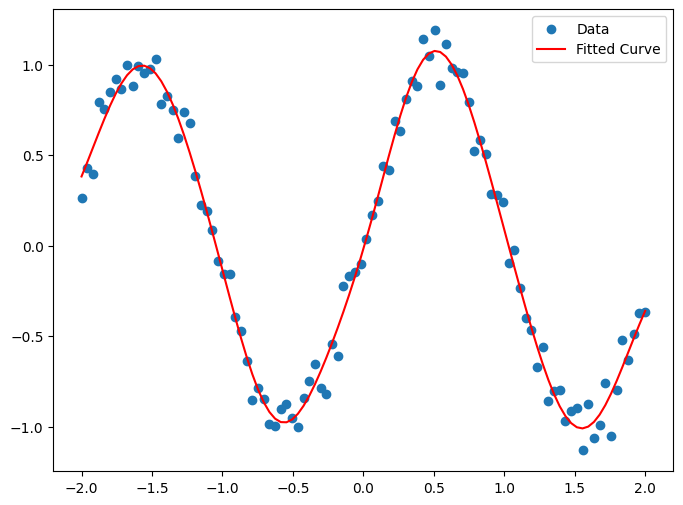

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred.detach().numpy(), 'r-', label='Fitted Curve')
plt.legend()
plt.show()

plt.scatter()でデータ点を散布図で、plt.plot()でガウシアン線形結合の予測値を線でプロットしています。

このままだと近似の精度がよくありませんね。次に、モデルの自由度を上げることでより良い近似ができることを確認しましょう。」
